In [45]:
import csv
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import seaborn as sns

font_path = 'C:\\Windows\\Fonts\\malgun.ttf'

font_prop = fm.FontProperties(fname=font_path).get_name()
print(font_prop)

matplotlib.rc('font', family=font_prop)

data = pd.read_csv("../data/인구현황.csv")
# 행정기관 전국의 데이터 삭제
data.drop(index=0, inplace=True)

data.columns

Malgun Gothic


Index(['행정기관코드', '행정기관', '총인구수', '세대수', '세대당 인구', '남자 인구수', '여자 인구수', '남여 비율'], dtype='object')

In [46]:
# 지역별 총인구수 Top5


pop_data = data[['행정기관','총인구수']].sort_values(by='총인구수', ascending=False).head(5)
pop_data


,행정기관,총인구수
9,경기도,13694685
1,서울특별시,9331828
2,부산광역시,3266598
16,경상남도,3228380
4,인천광역시,3021010


C:\Users\user\AppData\Local\Temp\ipykernel_10920\96547947.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes1.set_xticklabels(axes1.get_xticklabels(), rotation=45, ha='right')


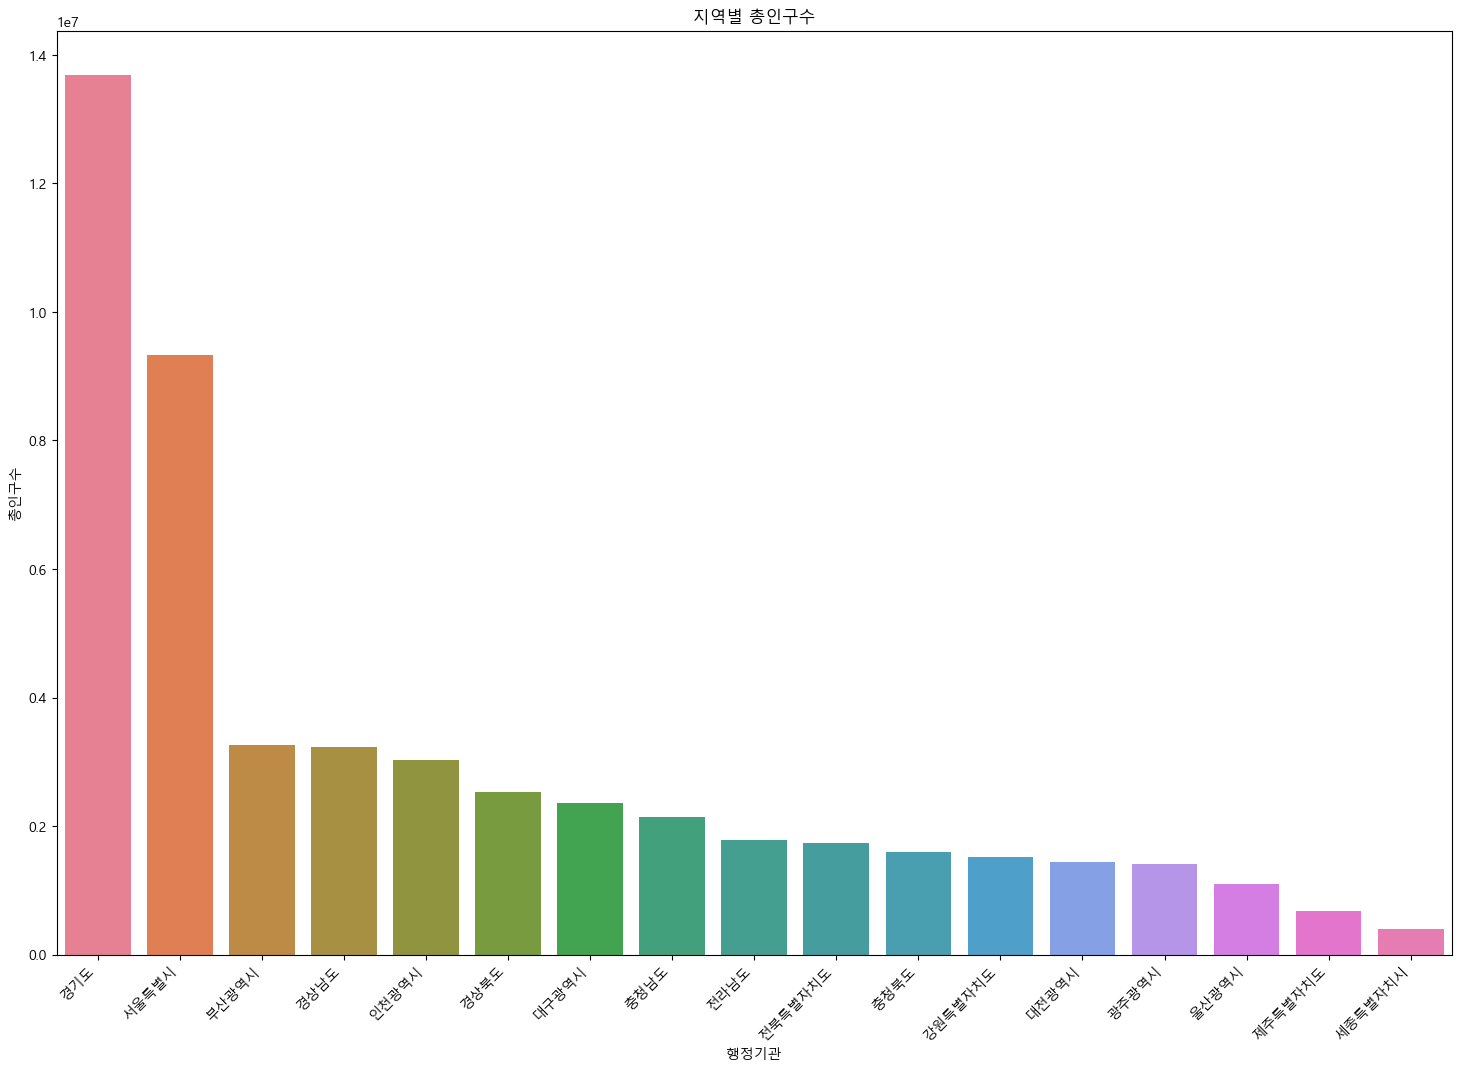

In [47]:
# 지역별 총인구수 plot

figure, axes1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)

sns.barplot(data=data.sort_values(by='총인구수', ascending=False), x='행정기관', y='총인구수', ax=axes1, hue='행정기관')

axes1.set_xticklabels(axes1.get_xticklabels(), rotation=45, ha='right')
plt.title('지역별 총인구수')
plt.show()

In [48]:
# 세대당 인구수 높은 지역 Top5

data[['행정기관', '세대당 인구']].sort_values(by='세대당 인구', ascending=False).reset_index(drop=True).head(5)

,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14


C:\Users\user\AppData\Local\Temp\ipykernel_10920\1833764282.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes1.set_xticklabels(axes1.get_xticklabels(), rotation=45, ha='right')


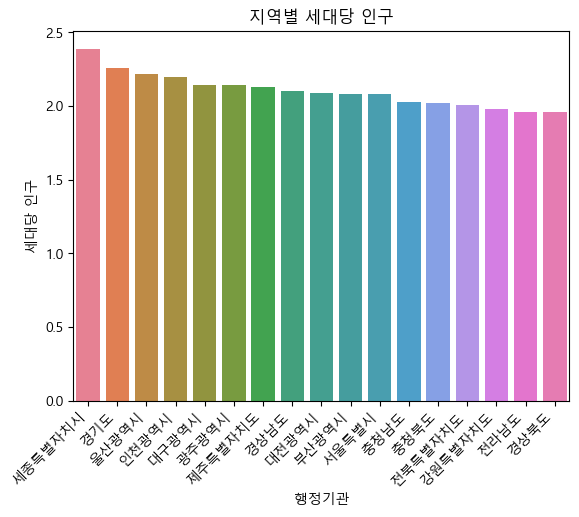

In [49]:
# 지역별 세대당 인구 Plot

figure, axes1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches=(24,12)

sns.barplot(data=data.sort_values(by='세대당 인구', ascending=False), x='행정기관', y='세대당 인구', ax=axes1, hue='행정기관')

axes1.set_xticklabels(axes1.get_xticklabels(), rotation=45, ha='right')
plt.title('지역별 세대당 인구')
plt.show()


In [52]:
# 남녀 비율 분석

data[['행정기관', '남여 비율']].sort_values(by='남여 비율', ascending=False).reset_index(drop=True)


,행정기관,남여 비율
0,울산광역시,1.06
1,충청남도,1.05
2,충청북도,1.04
3,경상남도,1.02
4,경상북도,1.02
5,전라남도,1.02
6,경기도,1.01
7,강원특별자치도,1.01
8,제주특별자치도,1.00
9,인천광역시,1.00


C:\Users\user\AppData\Local\Temp\ipykernel_10920\554080776.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes1.set_xticklabels(axes1.get_xticklabels(), rotation=45, ha='right')


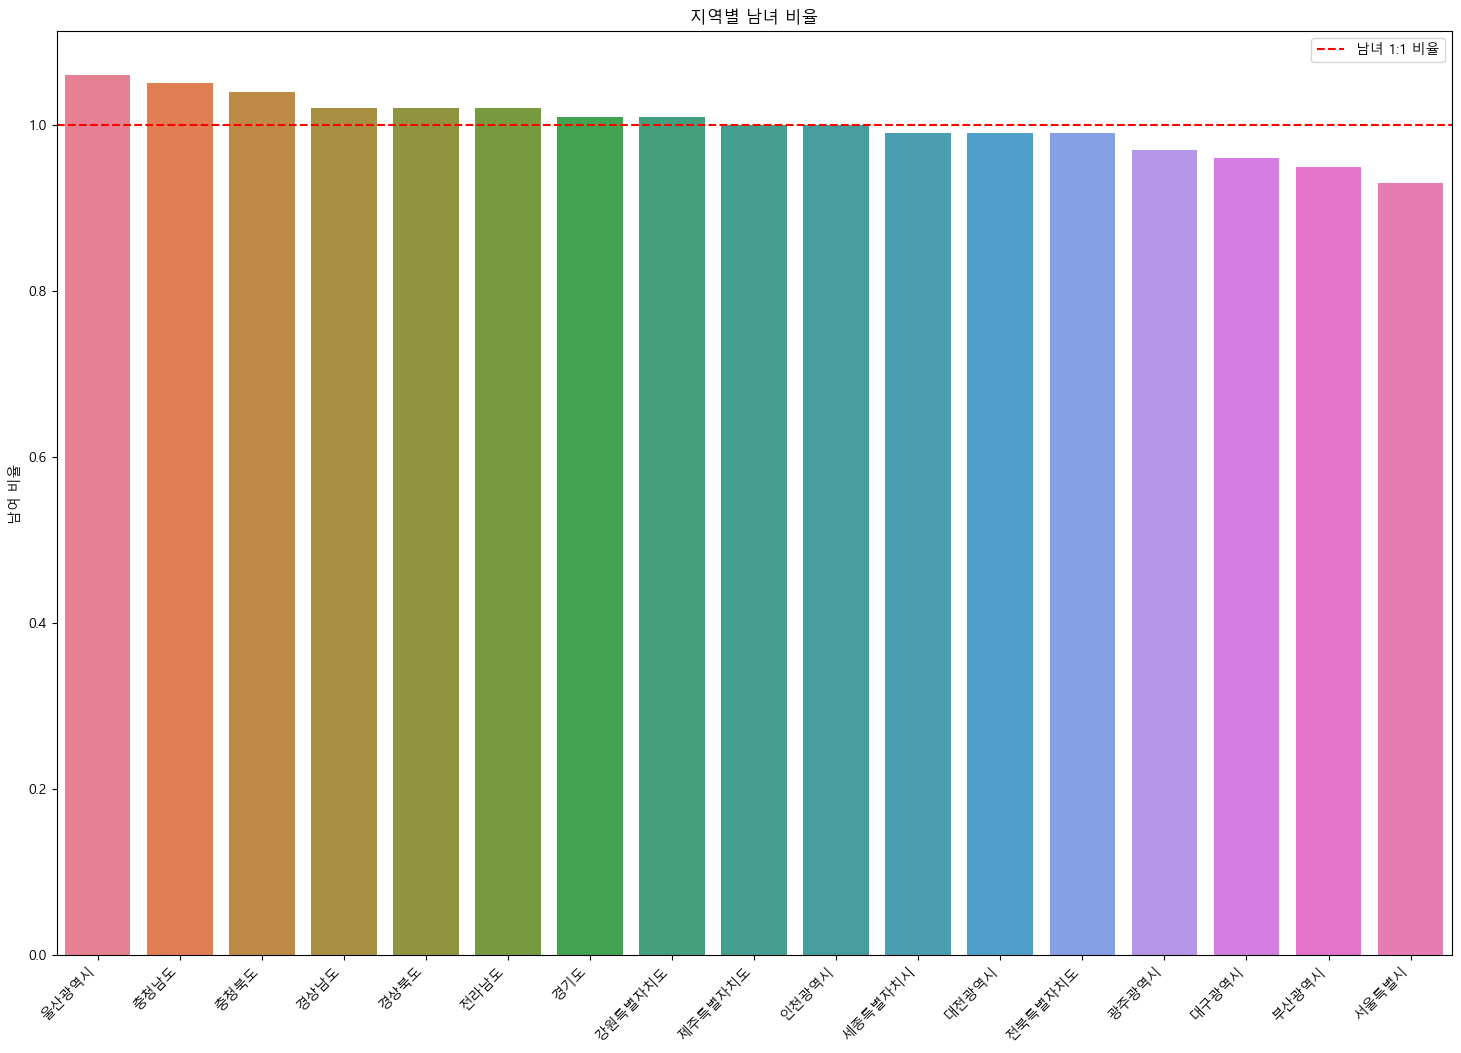

In [53]:
# 남녀 비율 분석 Plot

figure, axes1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)

sns.barplot(data=data.sort_values(by='남여 비율', ascending=False), x='행정기관', y='남여 비율', ax=axes1, hue='행정기관')

plt.title('지역별 남녀 비율')
axes1.set_xticklabels(axes1.get_xticklabels(), rotation=45, ha='right')
axes1.set_xlabel('')
plt.axhline(y=1, color='red', linestyle='--', label='남녀 1:1 비율')
plt.legend()
plt.show()

In [29]:
# 남자초과/ 여자초과 분석


data['남초여초'] = data['남여 비율'].apply(
    lambda x: '남초' if x > 1 else ('여초' if x < 1 else '동일')
)

data[['행정기관','남여 비율','남초여초']].reset_index(drop=True)


,행정기관,남여 비율,남초여초
0,서울특별시,0.93,여초
1,부산광역시,0.95,여초
2,대구광역시,0.96,여초
3,인천광역시,1.00,동일
4,광주광역시,0.97,여초
5,대전광역시,0.99,여초
6,울산광역시,1.06,남초
7,세종특별자치시,0.99,여초
8,경기도,1.01,남초
9,강원특별자치도,1.01,남초


In [18]:
# 세대당 인구 평균 보다 높은 지역
mean_data = sum(data['세대당 인구']) / len(data['세대당 인구'])

print(f"전국 평균 세대당 인구수 : {mean_data}")

data.loc[data['세대당 인구'] > mean_data, ['행정기관','세대당 인구']]\
    .sort_values(by='세대당 인구', ascending=False).reset_index(drop=True)

전국 평균 세대당 인구수 : 2.105294117647059


,행정기관,세대당 인구
0,세종특별자치시,2.39
1,경기도,2.26
2,울산광역시,2.22
3,인천광역시,2.20
4,대구광역시,2.14
5,광주광역시,2.14
6,제주특별자치도,2.13


C:\Users\user\AppData\Local\Temp\ipykernel_10920\929674096.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes2.set_xticklabels(axes2.get_xticklabels(), rotation=45, ha='right')


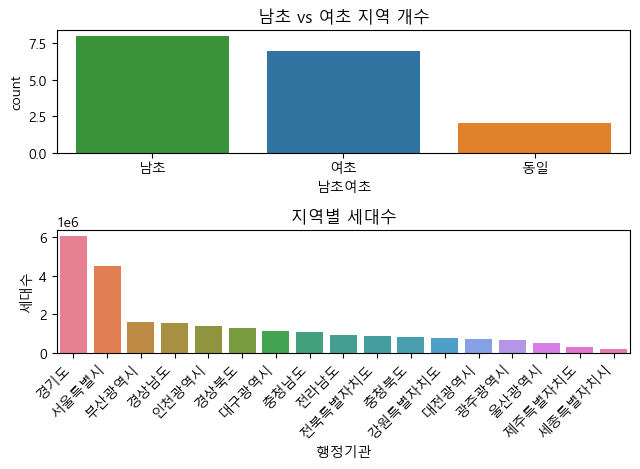

In [37]:
figure, (axes1, axes2) = plt.subplots(nrows=2, ncols=1)
figure.set_size_inches = (18,12)

sns.countplot(data=data, x='남초여초', ax=axes1, order=data['남초여초'].value_counts().index, hue='남초여초')
sns.barplot(data=data.sort_values(by='세대수', ascending=False), x='행정기관', y='세대수',ax=axes2, hue='행정기관')

axes1.set_title('남초 vs 여초 지역 개수')
axes2.set_title('지역별 세대수')
axes2.set_xticklabels(axes2.get_xticklabels(), rotation=45, ha='right')
figure.tight_layout()
plt.show()